Jupyter for kids jam session

> We wanted to explore data-driven cirriculum analysis.

In [1]:
from ast import literal_eval
from toolz.curried import *
from pandas import *
import requests
%reload_ext importable
api = __import__('2017-09-10-Project-Statistics')

In [2]:
url = 'https://api.github.com/repos/' + 'mikkokotila/jupyter4kids'
df = api._get_(url+'/contents/notebooks')

In [3]:
y = (df.download_url
 .apply(__import__('requests').get)
 .apply(requests.Response.json)
 .apply(io.json.json_normalize)
).pipe(lambda s: concat(dict(zip(df.name, s.tolist()))))

In [4]:
cells = y.cells.apply(DataFrame).reset_index(-1).cells.pipe(lambda df: concat(dict(df.items())))

In [5]:
_the_values_ = (cells[['outputs']]
 .dropna()
 .outputs.apply(DataFrame)
 .pipe(lambda df: concat(dict(df.items())))
 .data.dropna()).apply(compose(first, first, dict.values))

In [6]:
def evil(str):
    try: return literal_eval(str)
    except: return __builtin__.__dict__[str]

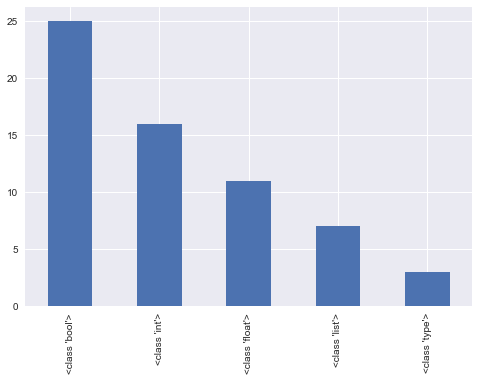

In [7]:
_the_values_.reset_index([1,2], drop=True).apply(evil).apply(type).value_counts().plot.bar()